In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

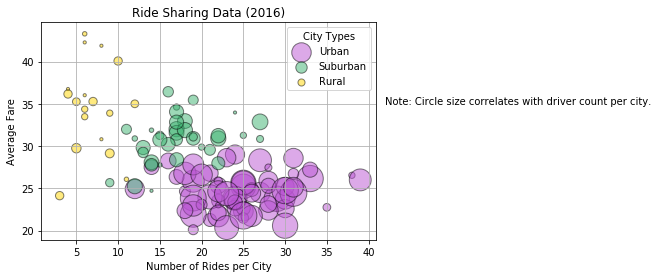

In [25]:
# Obtain the x and y coordinates for each of the three city types
ride_grouped = ride_df.groupby(["city"])
ride_count = ride_grouped["city"].count()
city_fare = ride_grouped["fare"].mean()

ride_count_and_avg_fare = pd.DataFrame({"Ride Count":ride_count, "Avg Fare":city_fare})
ride_count_and_avg_fare

city_merge = pd.merge(ride_count_and_avg_fare, city_df, on="city")

urban = city_merge.loc[city_merge["type"]=="Urban",:]
suburban = city_merge.loc[city_merge["type"]=="Suburban",:]
rural = city_merge.loc[city_merge["type"]=="Rural",:]

# Build the scatter plots for each city types
plt.scatter(urban["Ride Count"], urban["Avg Fare"], color="mediumorchid", label="Urban", marker="o", edgecolors="black", s=10*urban["driver_count"], alpha=0.5)
plt.scatter(suburban["Ride Count"], suburban["Avg Fare"], color="mediumseagreen", label="Suburban", marker="o", edgecolors="black", s=10*suburban["driver_count"], alpha=0.5)
plt.scatter(rural["Ride Count"], rural["Avg Fare"], color="gold", label="Rural", marker="o", edgecolors="black", s=10*rural["driver_count"], alpha=0.5)

# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
lgnd = plt.legend(loc="best", title="City Types")
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare")
plt.grid(True)
plt.text(42,35, "Note: Circle size correlates with driver count per city.");

# Save Figure

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

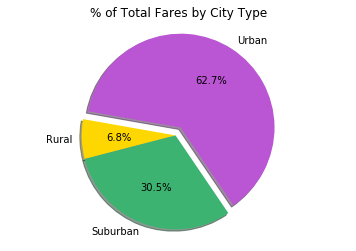

In [9]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

rides_by_type = data_df.groupby(["type"])
total_fares = rides_by_type["fare"].sum()
colors=["gold","mediumseagreen","mediumorchid"]
plt.pie(total_fares, labels=total_fares.index, autopct="%1.1f%%", shadow=True, startangle=170, explode=[0,0,0.1], colors=colors)
plt.axis("equal")
plt.title("% of Total Fares by City Type");

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

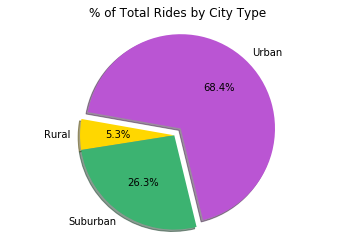

In [7]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

total_rides = rides_by_type["ride_id"].count()
colors=["gold","mediumseagreen","mediumorchid"]
plt.pie(total_rides, labels=total_rides.index, autopct="%1.1f%%", shadow=True, startangle=170, explode=[0,0,0.1], colors=colors)
plt.axis("equal")
plt.title("% of Total Rides by City Type");

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

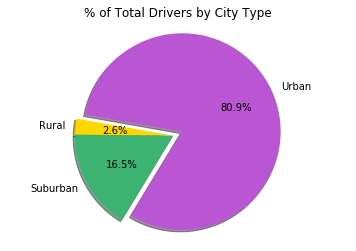

In [8]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

cities_by_type = city_df.groupby(["type"])
drivers_by_type = cities_by_type["driver_count"].sum()
colors=["gold","mediumseagreen","mediumorchid"]

plt.pie(drivers_by_type, labels=drivers_by_type.index, autopct="%1.1f%%", shadow=True, startangle=170, explode=[0,0,0.1], colors=colors)
plt.axis("equal")
plt.title("% of Total Drivers by City Type");

In [ ]:
# Show Figure
plt.show()